In [1]:
# change to True if you use Google Colaboratory:
GoogleColaboratory = False

In [2]:
import os, sys, importlib

if GoogleColaboratory :

    !pip3 install healpy
    
    user = "mahlers77"
    repo = "KSETA2023"

    if os.path.isdir(repo):
        !rm -rf {repo}

    !git clone https://github.com/{user}/{repo}.git

    if not repo in sys.path:
        sys.path.insert(1, repo)

else :
    repo = "."

#for path in sys.path : 
#  print(path)

In [3]:
%matplotlib inline
import numpy as np
import healpy as H
from pylab import *
import matplotlib.pyplot as plt
from scipy.special import erf

/Users/mahlers/.pyenv/versions/3.7.7/lib/python3.7/site-packages/healpy/projaxes.py:209: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  **kwds


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


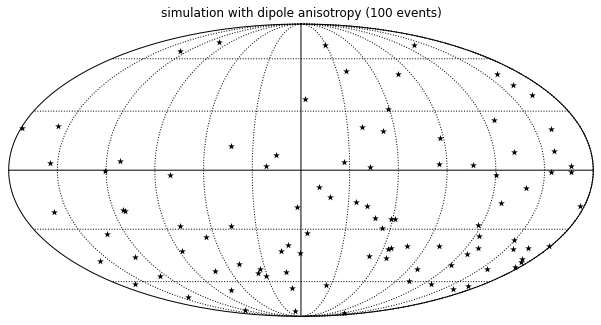

In [16]:
nside = 32
npix = H.nside2npix(nside)

map = np.zeros(npix,dtype=int)

Ntot = 100

H.mollview(map,title=r'simulation with dipole anisotropy (' + str(Ntot) + ' events)',min=0,max=1,cbar=False,cmap="Greys")
H.graticule()

theta = []
phi = []
nx = []
ny = []
nz = []

for i in range(0,Ntot) :
    phitemp = np.random.rand()*2*np.pi
    x = np.random.rand()
    
    # dipole anisotropy :
    ani = 0.9 # parameter between -1.0 and 1.0
    costhetatemp = (1.-np.sqrt(1.0+2.*ani+ani**2-4.*ani*x))/ani
    
    #isotropic :
    #costhetatemp = 2.0*x-1.0
    
    thetatemp = np.arccos(costhetatemp)
    
    nxtemp = np.cos(phitemp)*np.sin(thetatemp)
    nytemp = np.sin(phitemp)*np.sin(thetatemp)
    nztemp = np.cos(thetatemp)
    
    phi.append(phitemp)
    theta.append(thetatemp)
    nx.append(nxtemp)
    ny.append(nytemp)
    nz.append(nztemp)
    
    H.projscatter(thetatemp,phitemp,marker='*',s=50,color='black',linewidth=0)

In [17]:
cosphi = []
for i in range(0,Ntot) :
    for j in range(0,i) :
        cosphitemp = nx[i]*nx[j] + ny[i]*ny[j] + nz[i]*nz[j]
        cosphi.append(cosphitemp)

totpairs = len(cosphi)

Nbins = 1000

y = np.zeros(Nbins,dtype=int)
cosx = np.arange(0,Nbins)/(1.0*Nbins)*2.0-1.0
x = np.arccos(cosx)

for i in range(0,totpairs) :
    bin = int((cosphi[i]+1.)/2.*Nbins)
    y[bin] += 1

sumy = np.zeros(Nbins,dtype=int)


for i in range(0,Nbins) :
    for j in range(i+1,Nbins) :
        sumy[i] += y[j]

sumy = sumy/(1.*totpairs)
sumyiso = 1./2.*(1.0-cosx)

KS = np.max(np.abs(sumy-sumyiso))
KSindex = np.argmax(np.abs(sumy-sumyiso))

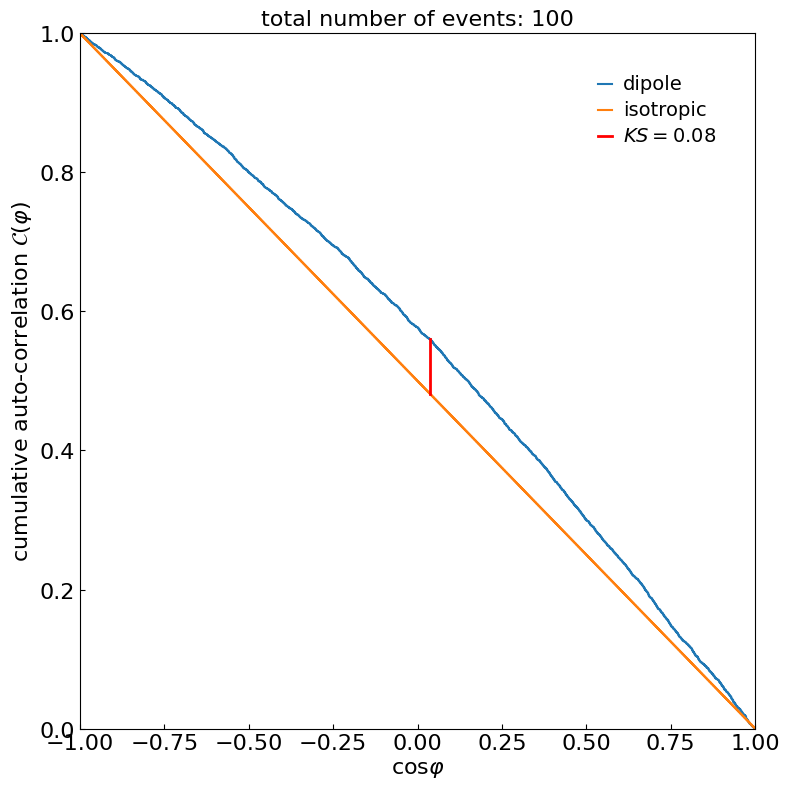

In [18]:
NKS = 100
delta = 0.002

# plot histograms of simulation

fig = figure(dpi=100,tight_layout=True,figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

xlim([-1,1])
ylim([0,1])

title(r'total number of events: ' + str(Ntot),fontsize=16)
xlabel(r'$\cos\varphi$',fontsize=16)
ylabel(r'cumulative auto-correlation $\mathcal{C}(\varphi)$',fontsize=16)
ax.tick_params(axis='both',which='both',direction='in')

for tick in ax.xaxis.get_major_ticks() :
    tick.label.set_fontsize(16) 

for tick in ax.yaxis.get_major_ticks() :
    tick.label.set_fontsize(16)  
    
plt.plot(cosx,sumy,drawstyle='steps-mid',label=r'dipole')
plt.plot(cosx,sumyiso,drawstyle='steps-mid',label=r'isotropic')
plt.plot(np.array([cosx[KSindex],cosx[KSindex]]),np.array([sumy[KSindex],sumyiso[KSindex]]),color='red',linewidth=2.0,label='$KS = ' + '{:.2f}'.format(KS) + '$')

leg = plt.legend(bbox_to_anchor=(0.95, 0.95), loc=1, borderaxespad=0.,fancybox=False,\
                 framealpha=0.0,frameon=True,numpoints=1, scatterpoints = 1,handlelength=1)
for t in leg.get_texts() :
    t.set_fontsize(14)

plt.show()